# Session 1: Oneway

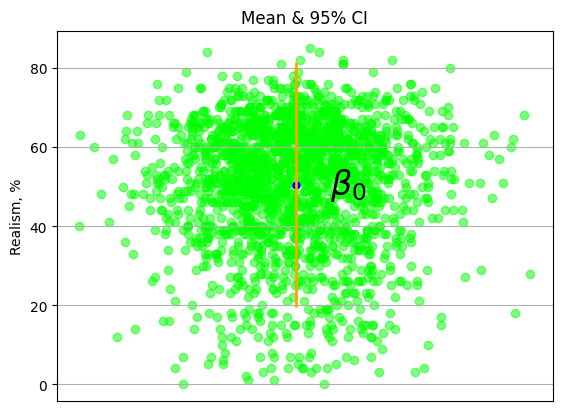

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io 

# Load the data from the URL using requests
url = 'https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt'
response = requests.get(url)
content = response.content.decode('utf-8')
file = io.StringIO(content)
data = pd.read_csv(file, sep='\t')

# Extract relevant columns
bmi = data['age']
x = [1] * len(age)

# Calculate mean and standard deviation
mean_age = age.mean()
std_age = age.std()

# Calculate upper and lower bounds for 95% confidence interval
ub = mean_age + std_age * 1.96
lb = mean_age - std_age * 1.96

# Add jitter to x-axis values
x_jitter = x + np.random.normal(0, 0.02, size=len(x))

# Scatter plot of age with increased jitter
plt.scatter(x_jitter, age, c='lime', alpha=0.5)

# Mean point
plt.scatter(1, mean_age, c='blue', s=25)

# Confidence interval with thicker line
plt.errorbar(1, mean_age, yerr=[[mean_age - lb], [ub - mean_age]], color='orange', linewidth=2)

# Styling
plt.ylabel('Realism, %')
plt.title('Mean & 95% CI')
plt.text(1.01, mean_age, r'$\beta_0$', va='center', fontsize=24)
plt.xticks([])
plt.grid(True)

# Save the figure
plt.savefig('age_m_95ci.png')
plt.show()